# TECH CHALLENGE - FASE I


###    TAREFAS:
####         Exploração de dados:
            ✓ Carregue a base de dados e explore suas características.
            ✓ Analise estatísticas descritivas e visualize distribuições relevantes.

####        Pré-processamento de dados:
            ✓ Realize a limpeza dos dados, tratando valores ausentes (se necessário).
            ✓ Converta variáveis categóricas em formatos adequados para modelagem.

####        Modelagem:
            ✓ Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
            ✓ Divida o conjunto de dados em conjuntos de treinamento e teste.

####        Treinamento e avaliação do modelo:
            ✓ Treine o modelo com o conjunto de treinamento.

####        Validação estatística:
            Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

####        O que avaliaremos:
            Apresente resultados visuais, como gráficos de previsões vs. valores reais.
            Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

####        Observações:
            Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.



### ENTREGÁVEL:

####    Como entregável, o grupo deve enviar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.

####    O vídeo deve estar em uma plataforma como Youtube.

####    Boa sorte! Qualquer dúvida, não deixe de nos chamar no Discord, lá poderemos tirar suas dúvidas e auxiliar nesta tarefa.


* Créditos da base de dados com menor volume de dados:
https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 539.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 1.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 495.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━

In [1]:
# Nome da base de dados
NOME_BASE_DE_DADOS = "../Base_de_dados/insurance.csv"

Montagem do da base de dados via google drive:

In [30]:
# from google.colab import drive
# drive.mount('/content/drive/')

# /content/drive/MyDrive/insurance.csv

Realizando a remoção dos itens repetidos manualmente

In [2]:
# Função para a remoção de duplicidades em arquivo de dados (linha a linha):
def remocao_manual_duplicidades():
    novo_conteudo = ""

    lista_linhas_repetidas = []

    with open(NOME_BASE_DE_DADOS, 'r') as arquivo:
        contador_linha = 0
        for linha in arquivo:
            contador_linha = 0
            with open(NOME_BASE_DE_DADOS, 'r') as arquivo2:
                for linha2 in arquivo2:
                    if linha == linha2:
                        contador_linha += 1
                        if(contador_linha > 1):
                            print(f"linha Repetida {linha2}")
                            lista_linhas_repetidas.append(linha)
                        elif(contador_linha == 1):
                            if(linha not in lista_linhas_repetidas):
                                novo_conteudo += linha

    with open(NOME_BASE_DE_DADOS, 'w') as arquivo:
        arquivo.write(novo_conteudo)


# if("insurance_dataset.csv" not in NOME_BASE_DE_DADOS):
#     remocao_manual_duplicidades()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #gráficos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings #remoção de avisos


import numpy as np
# np.random.seed(42)

# Importando a base de dados
dados_original = pd.read_csv(NOME_BASE_DE_DADOS, sep=",")

Removendo os registros duplicados via pandas.

In [7]:
# lista os registros duplicados
def list_duplicated(dados):
    duplicados = dados.duplicated()
    numero_duplicados = duplicados.sum()
    print(f"Número de registros duplicados: {numero_duplicados}")

    linhas_duplicadas = dados[duplicados]
    #print(linhas_duplicadas)


# remove os registros duplicados
def remove_duplicated(dados):
    list_duplicated(dados);
    print(dados.shape)
    print("removendo dados duplicados...")
    # Removendo duplicados (por padrão, mantém a primeira linha)
    dados = dados.drop_duplicates()
    # reindexando a base de dados
    dados = dados.reset_index(drop=True)
    print(dados.shape)
    return dados

dados_original = remove_duplicated(dados_original)

Número de registros duplicados: 1
(1338, 7)
removendo dados duplicados...
(1337, 7)


### Analisando o conteúdo dos dados

In [8]:
dados_original.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Informações estruturais sobre o dataframe
dados_original.shape


(1337, 7)

### Análise exploratória dos dados

In [10]:
# Estatísticas sobre o dataframe
display(dados_original.describe())

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Tratando inconsistências na base

Verificando se existem valores nulos nas informações.

In [11]:
# Verificando a ausência de informações
dados_original.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
print("Informações sobre o DataFrame dados:")
print(dados_original.info())

Informações sobre o DataFrame dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


### Feature scalling dos dados.

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dados=dados_original.copy()

# Ajustar e transformar os rótulos
dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
dados_dummies = dados.copy()
dados['region'] = label_encoder.fit_transform(dados['region'])

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
dados_dummies = pd.get_dummies(dados_dummies, columns=["region"])

dados_dummies.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [16]:
dados_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   bool   
 7   region_northwest  1337 non-null   bool   
 8   region_southeast  1337 non-null   bool   
 9   region_southwest  1337 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.0 KB


In [17]:
dados_dummies['region_northeast'] = label_encoder.fit_transform(dados_dummies['region_northeast'])
dados_dummies['region_northwest'] = label_encoder.fit_transform(dados_dummies['region_northwest'])
dados_dummies['region_southeast'] = label_encoder.fit_transform(dados_dummies['region_southeast'])
dados_dummies['region_southwest'] = label_encoder.fit_transform(dados_dummies['region_southwest'])

In [18]:
dados_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.6 KB


In [19]:
dados_dummies.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### Estatísticas dos dados

Fumante ou não fumante.

In [ ]:
# dados_original.groupby("smoker").count()

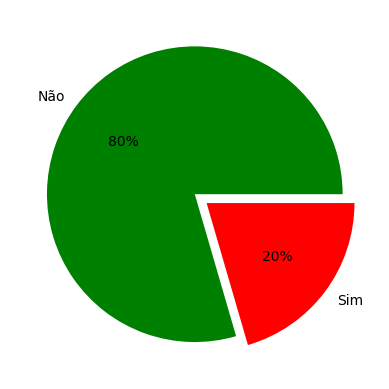

In [11]:
categororias = ["Não", "Sim"]
plt.pie(dados["smoker"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

[Text(8.375000000000002, 0.5, '')]

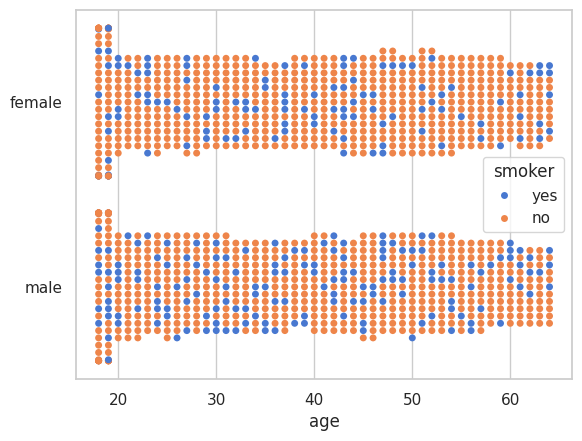

In [12]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.swarmplot(data=dados_original, x="age", y="sex", hue="smoker")
ax.set(ylabel="")

Homem ou mulher.

In [ ]:
# dados_original.groupby("sex").count()

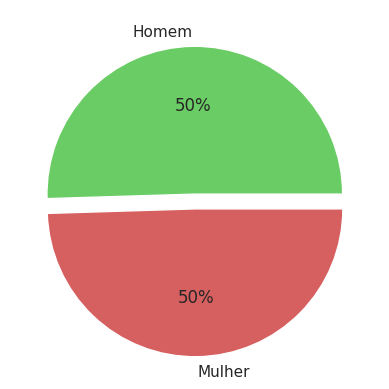

In [14]:
categororias = ["Homem", "Mulher"]
plt.pie(dados["sex"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

Relação BMI e sexo

/tmp/ipykernel_317941/4045041492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='bmi', data=dados_original, palette='hls')


<Axes: xlabel='sex', ylabel='bmi'>

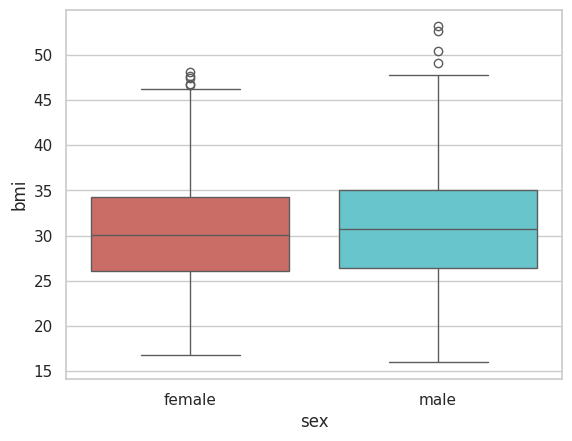

In [15]:
sns.boxplot(x='sex', y='bmi', data=dados_original, palette='hls')

Histograma da idade

<Axes: xlabel='age', ylabel='Count'>

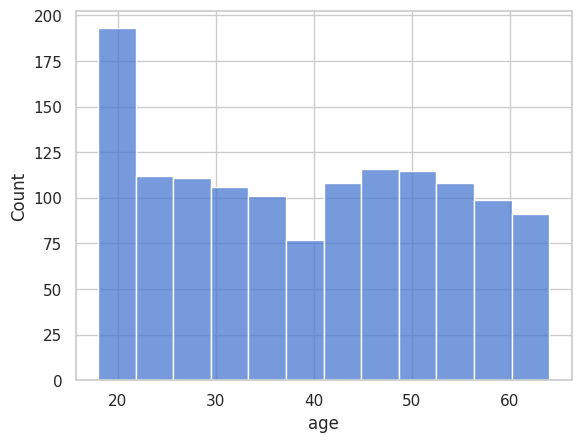

In [105]:
sns.histplot(data=dados, x="age")

<Axes: xlabel='age'>

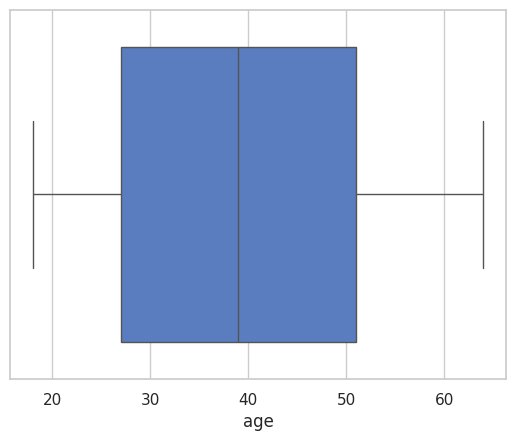

In [106]:
sns.boxplot(x=dados["age"])

Histograma do BMI

<Axes: xlabel='bmi', ylabel='Count'>

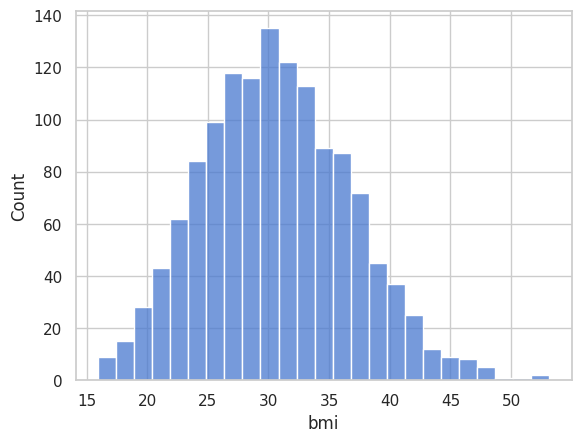

In [107]:
sns.histplot(data=dados, x="bmi")

Outliers do BMI

<Axes: xlabel='bmi'>

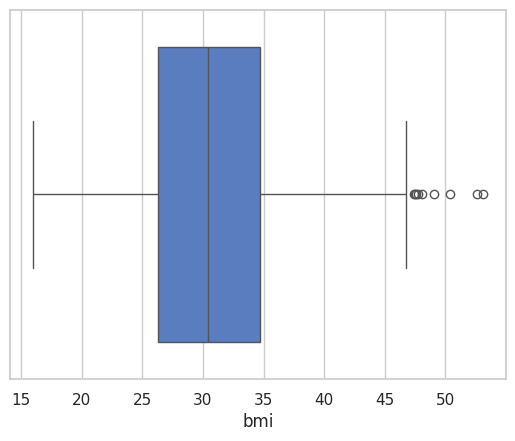

In [108]:
sns.boxplot(x=dados["bmi"])

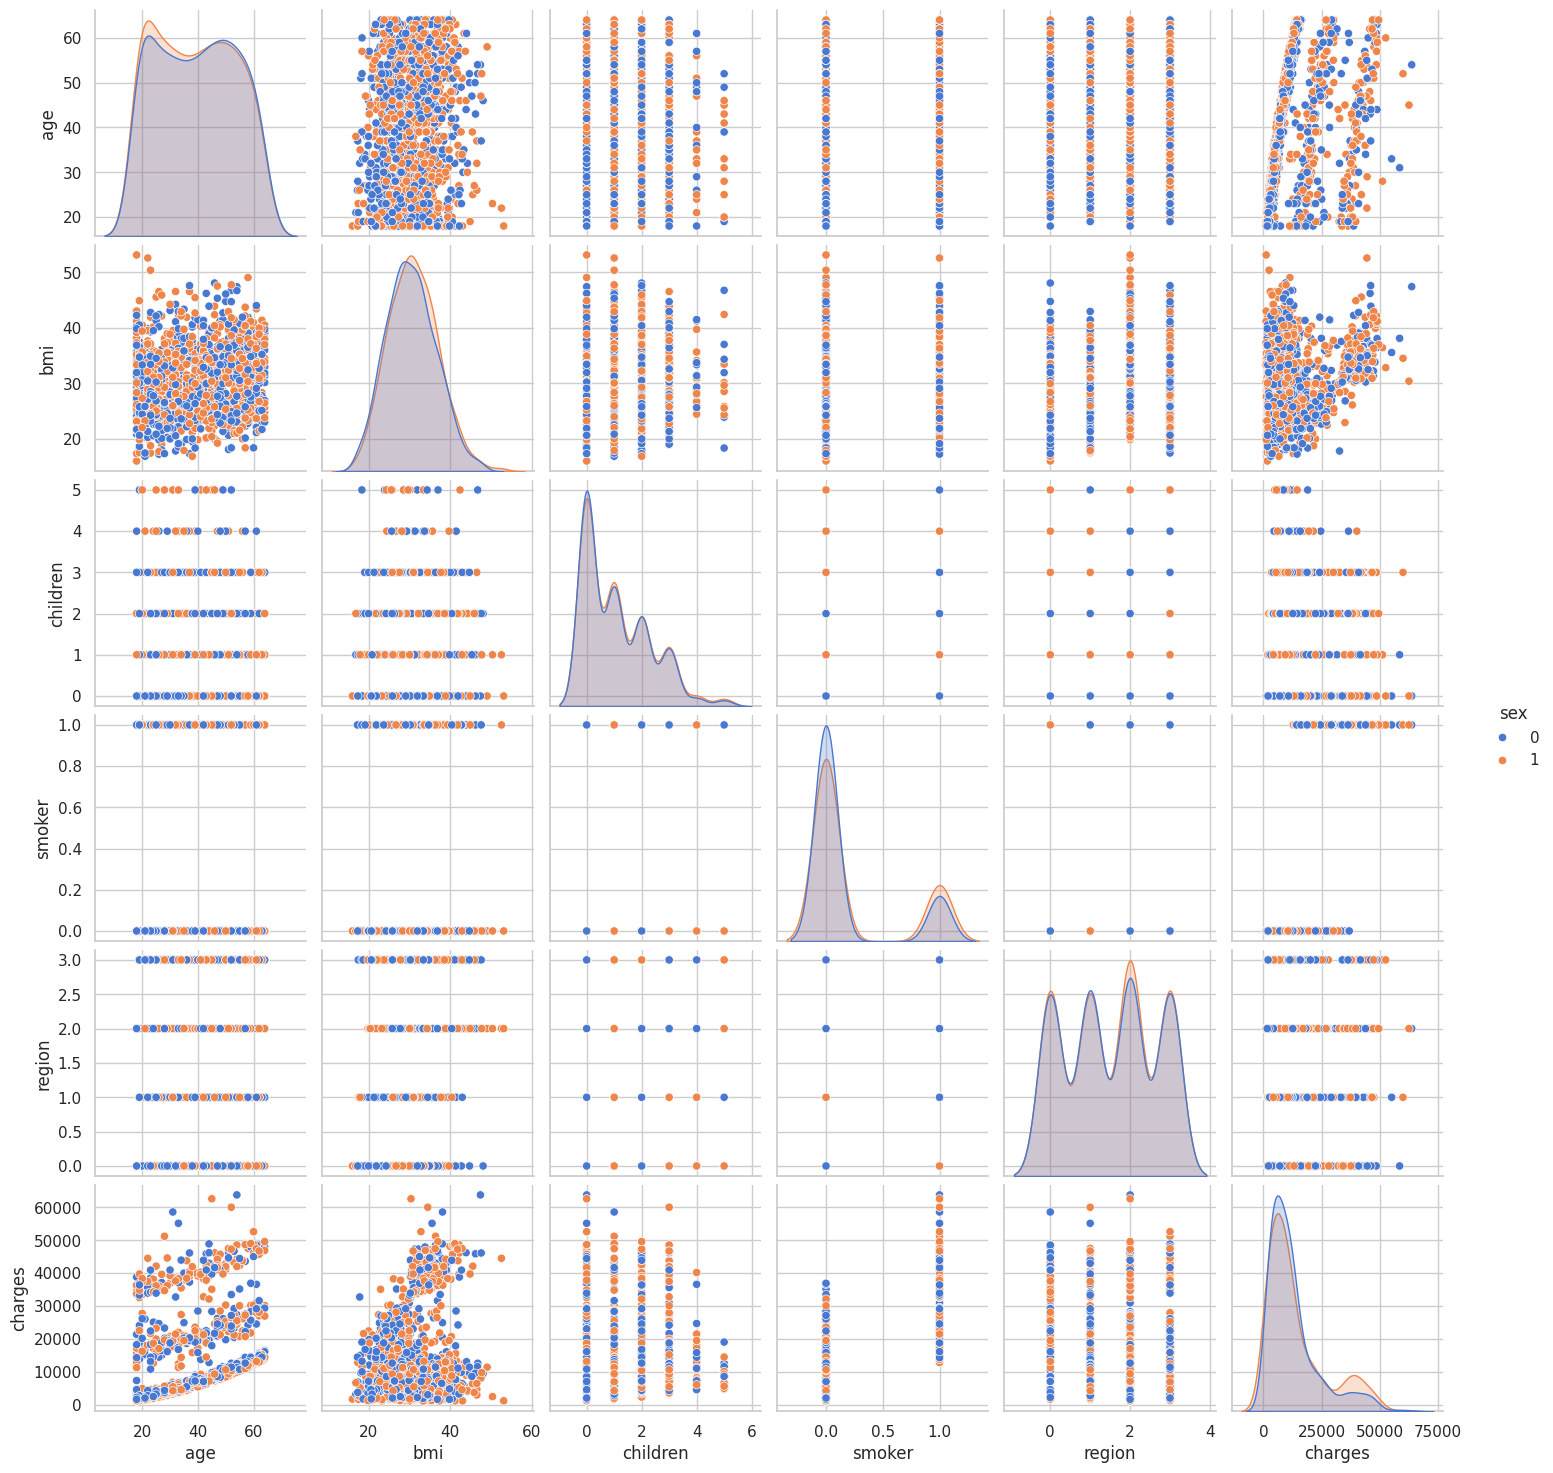

In [109]:
sns.pairplot(dados,vars=['age', 'bmi', 'children', 'smoker', 'region', 'charges'],hue="sex", )

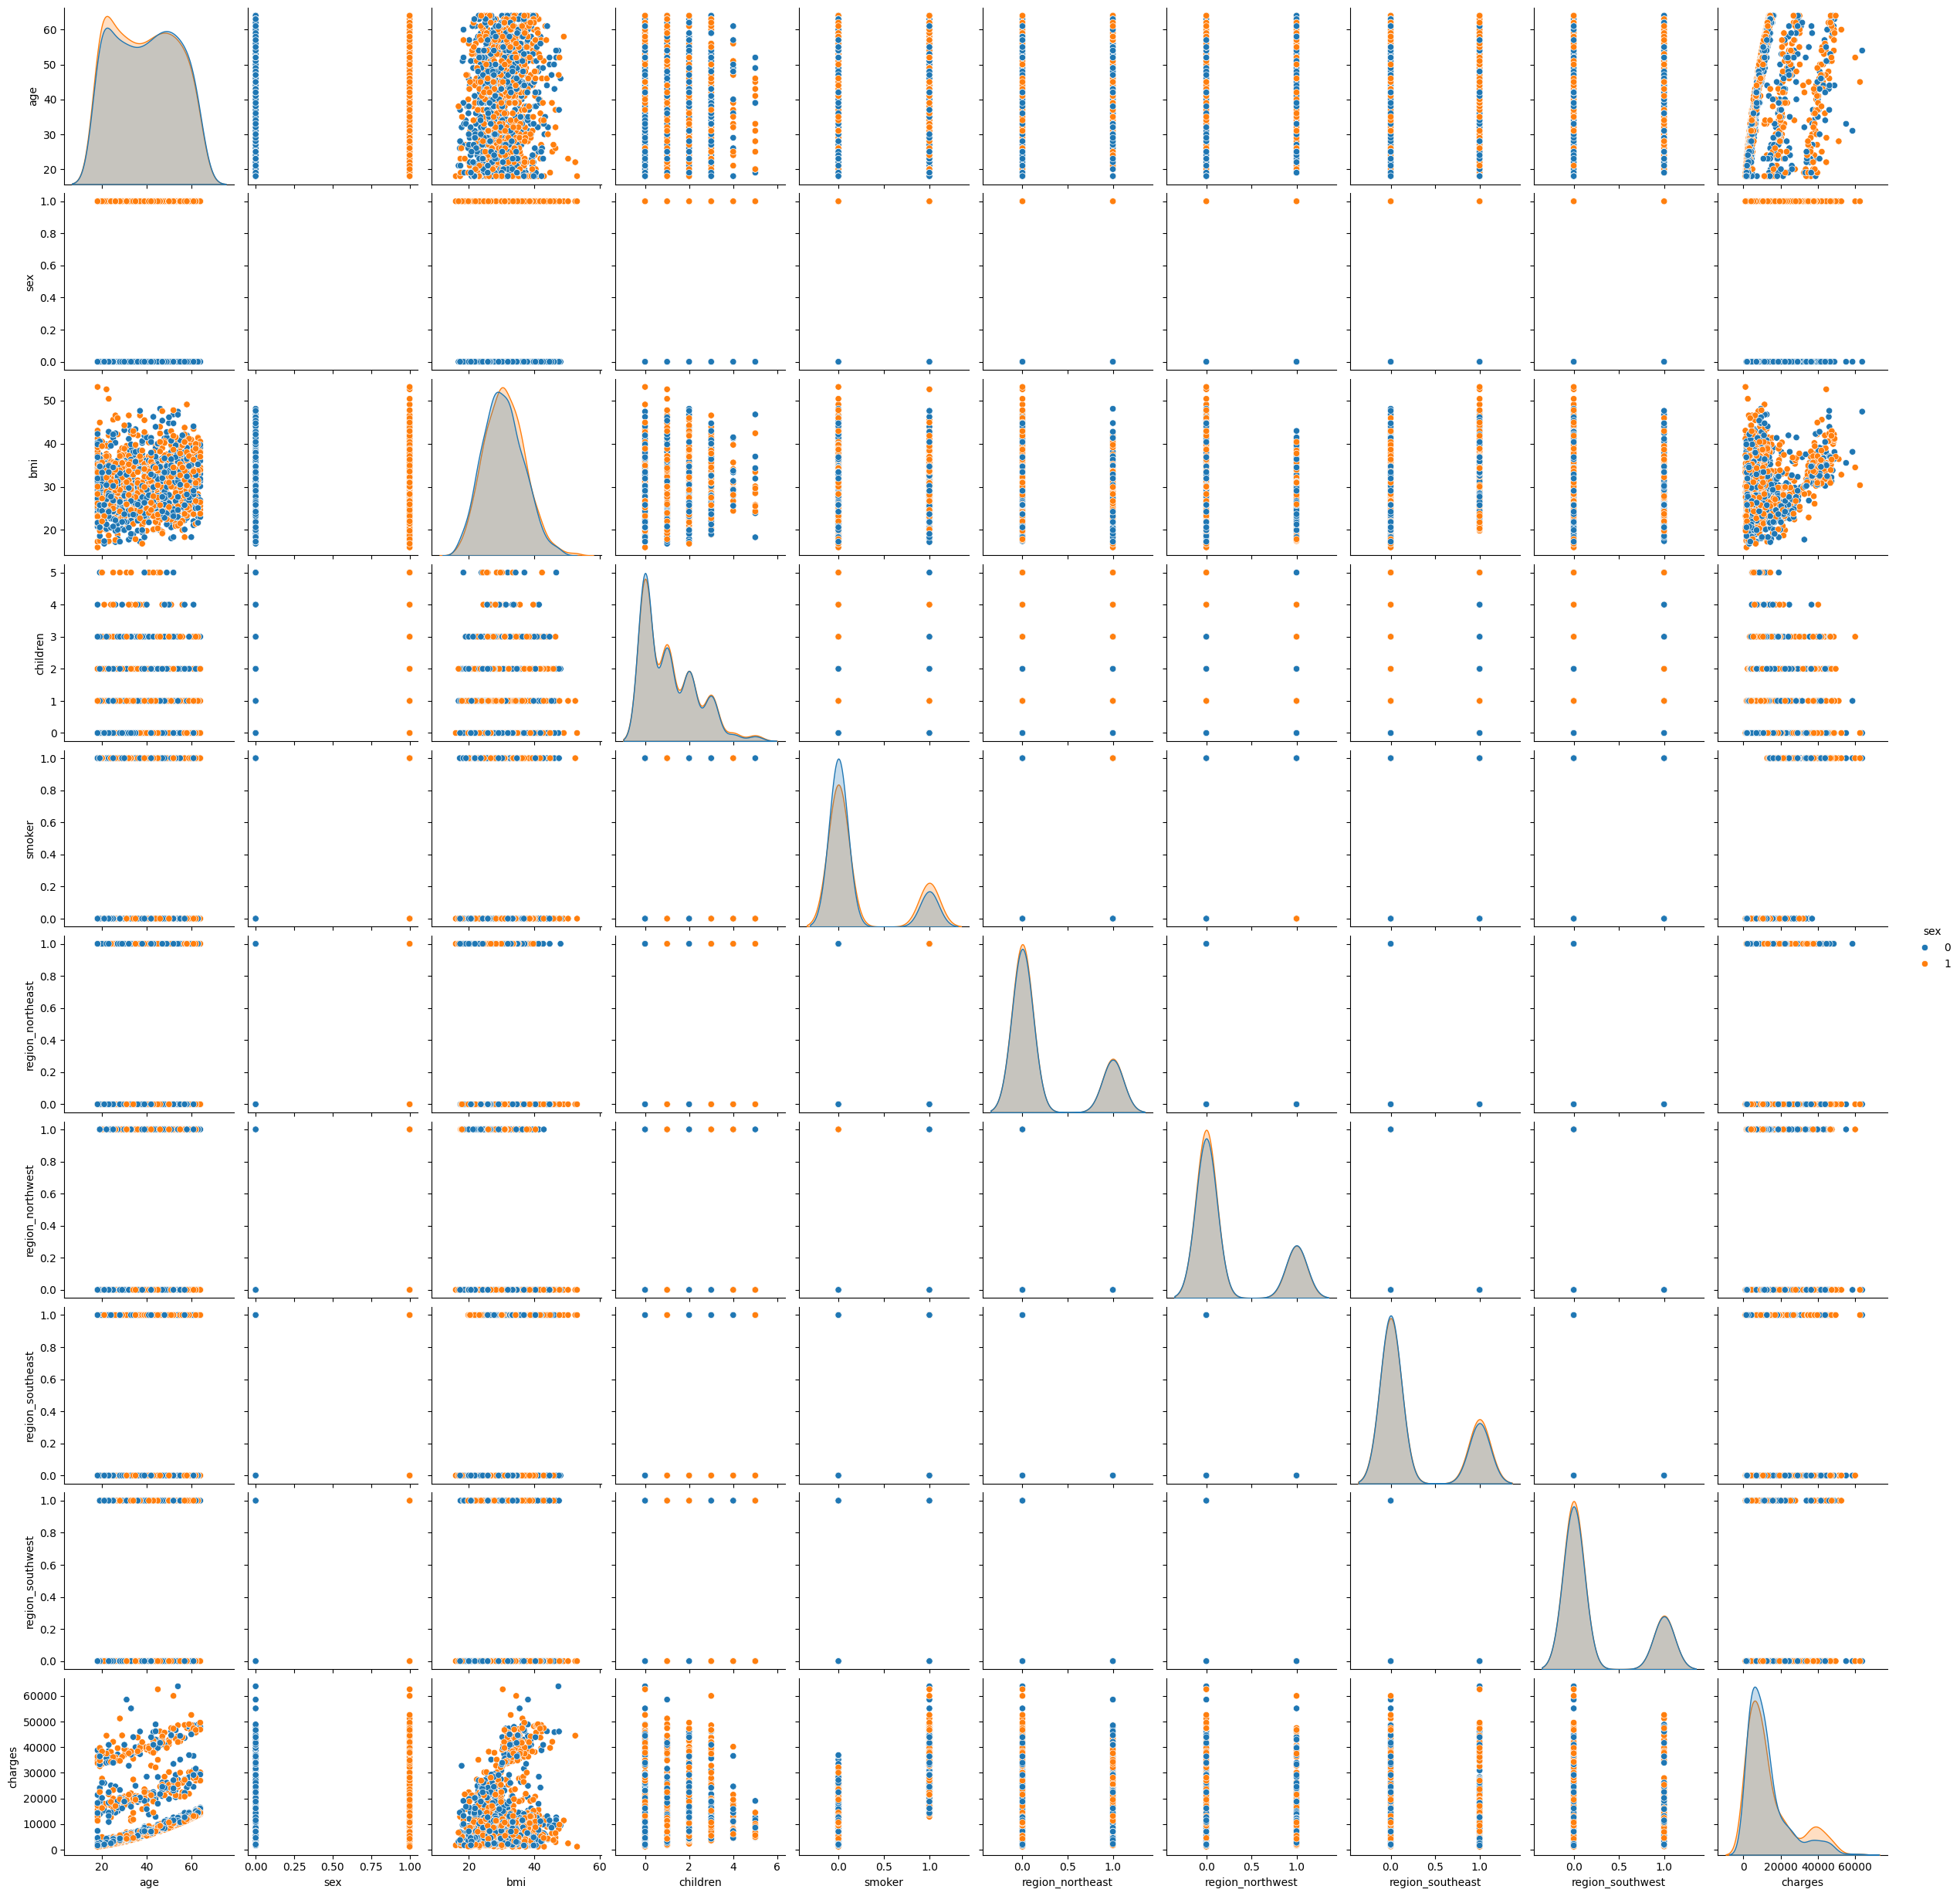

In [60]:
sns.pairplot(dados_dummies,vars=['age', 'sex', 'bmi' , 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges'],hue="sex", )

Correlações

<Axes: >

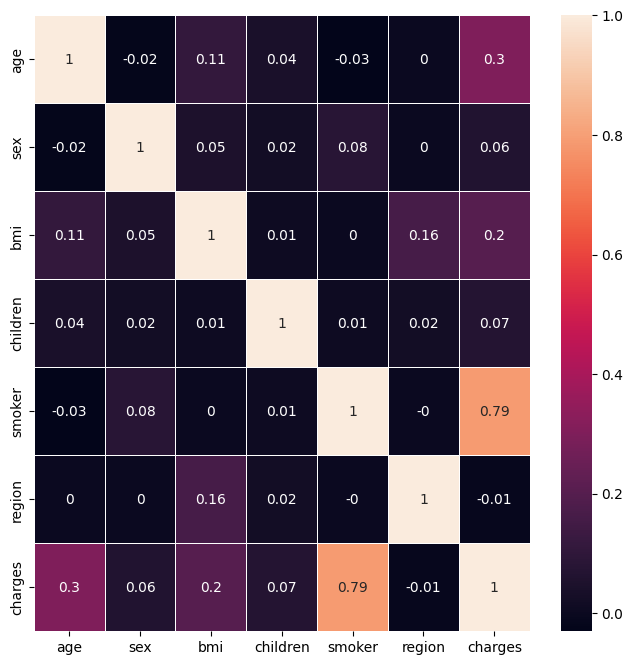

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

<Axes: >

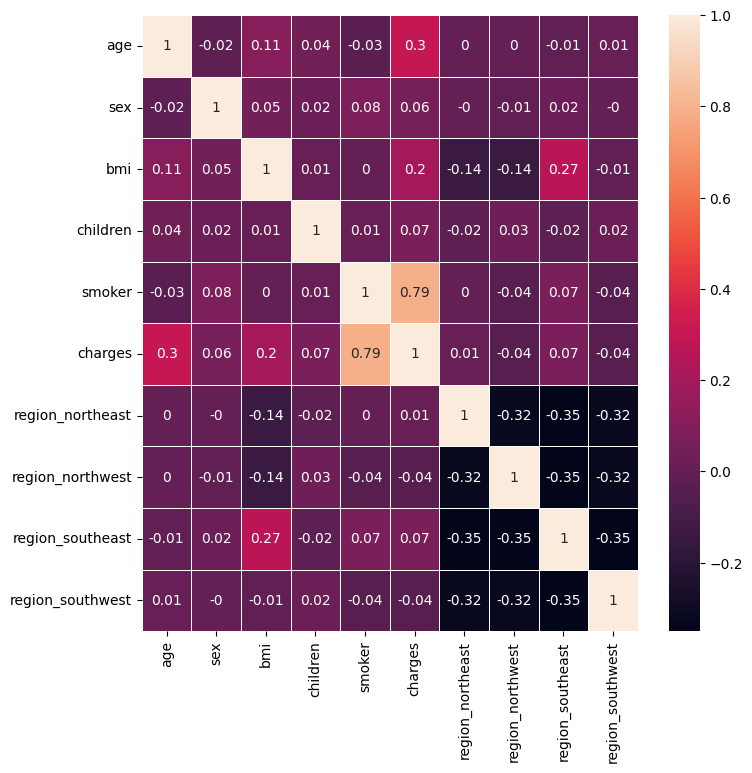

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = dados_dummies.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Charges

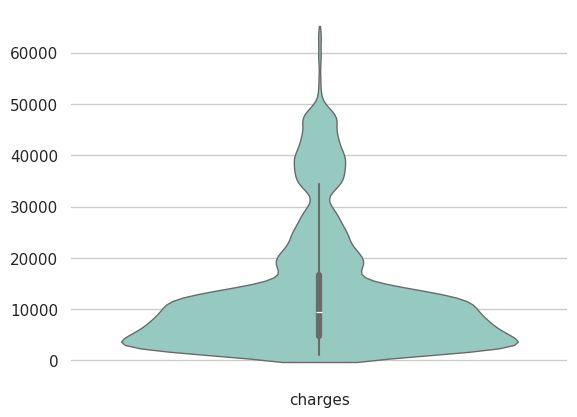

In [123]:
sns.violinplot(data=dados[['charges']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Age e BMI.

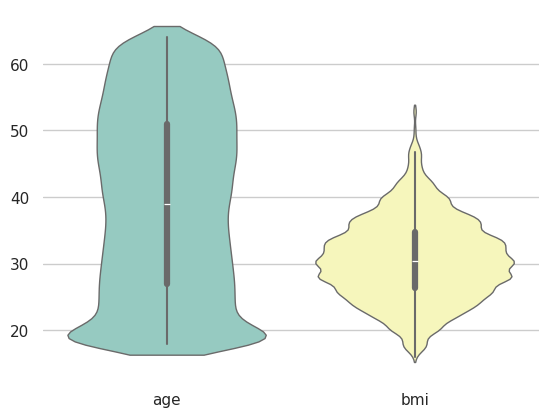

In [125]:
sns.violinplot(data=dados[['age', 'bmi']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Preparando os dados dos eixos X e Y para uso na padronização dos dados.

In [16]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] #, 'charges']
X = dados[features].values
y = dados['charges'].values

Padronização dos dados do eixo X.

In [ ]:
# X = StandardScaler().fit_transform(X)
# df_padronizado = pd.DataFrame(data=X, columns=features)
# display(df_padronizado.head())

Testando regressão linear múltipla

In [2]:
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 15.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 11.4 MB/s eta 0:00:00


Treinando o modelo OLS e impmirindo as estatísticas de sua execução.

In [28]:
import statsmodels.api as sm

# Definir as variáveis independentes (X)
X = dados[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
# Definir a variável dependente (Y)
Y = dados['charges']

# Criar e ajustar o modelo de regressão linear múltipla
modelo_OLS = sm.OLS(Y, X).fit()

# Imprimir os resultados do modelo
print(modelo_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1536.
Date:                Sat, 25 May 2024   Prob (F-statistic):                        0.00
Time:                        20:47:34   Log-Likelihood:                         -13611.
No. Observations:                1337   AIC:                                  2.723e+04
Df Residuals:                    1331   BIC:                                  2.727e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Testando a predição com base nos valores treinados.

In [29]:
#                        ['age', 'sex', 'bmi' , 'children', 'smoker', 'region']
print(modelo_OLS.predict([41   , 1    , 27.755, 0         , 0       , 1       ]))
print(modelo_OLS.predict([41   , 1    , 18.5  , 0         , 0       , 1       ]))


[8668.72038348]
[8089.32886208]


Imprimindo as estatísticas do modelo OLS.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# realizar as previsões
y_pred_OLS = modelo_OLS.predict(X)

# Calcular MAE, MSE e RMSE
mae_OLS = mean_absolute_error(Y, y_pred_OLS)
mse_OLS = mean_squared_error(Y, y_pred_OLS)
rmse_OLS = np.sqrt(mse_OLS)

# Imprimindo as métricas
print(f'MAE: {mae_OLS}')
print(f'MSE: {mse_OLS}')
print(f'RMSE: {rmse_OLS}')

MAE: 4401.852239154551
MSE: 40751910.019925125
RMSE: 6383.722269955447


Gráficos de previsões versus valores reais

In [31]:
def transformar_vetor(lista_numpy):
    saida = [item for item in lista_numpy]
    return saida

y_vetor = transformar_vetor(Y.values)
y_pred_OLS_vetor = transformar_vetor(y_pred_OLS.values)

pd_predicao = pd.DataFrame({'charges': y_vetor, 'charges_prevision': y_pred_OLS_vetor})

NameError: name 'ax' is not defined

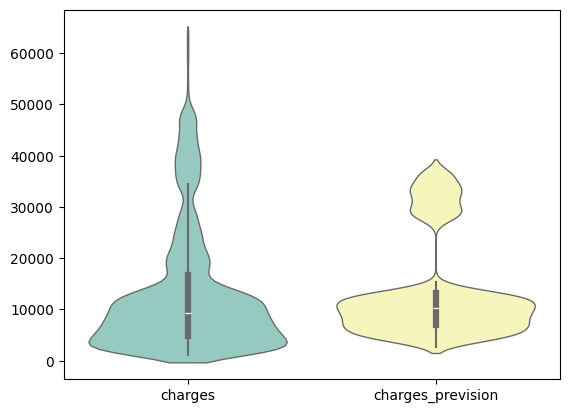

In [32]:

sns.violinplot(data=pd_predicao[['charges', 'charges_prevision']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

*****
Testando o OLS com Hot encoding.

In [55]:
import statsmodels.api as sm

# Definir as variáveis independentes (X)
# age	sex	bmi	children	smoker	charges	region_northeast	region_northwest	region_southeast	region_southwest
X2 = dados_dummies[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
# Definir a variável dependente (Y)
Y2 = dados_dummies['charges']

# Criar e ajustar o modelo de regressão linear múltipla
modelo_OLS2 = sm.OLS(Y2, X2).fit()

# Imprimir os resultados do modelo
print(modelo_OLS2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        21:21:26   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.7646     11.912  

In [56]:
#                        ['age', 'sex', 'bmi' , 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
print(modelo_OLS2.predict([41   , 1    , 27.755, 0         , 0       , 1                , 0                 , 0                 , 0                 ]))
print(modelo_OLS2.predict([41   , 1    , 18.5  , 0         , 0       , 1                , 0                 , 0                 , 0                 ,]))


[7877.20390097]
[4737.44178491]


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# realizar as previsões
y_pred_OLS2 = modelo_OLS2.predict(X2)

# Calcular MAE, MSE e RMSE
mae_OLS2 = mean_absolute_error(Y2, y_pred_OLS2)
mse_OLS2 = mean_squared_error(Y2, y_pred_OLS2)
rmse_OLS2 = np.sqrt(mse_OLS2)

# Imprimindo as métricas
print(f'MAE: {mae_OLS2}')
print(f'MSE: {mse_OLS2}')
print(f'RMSE: {rmse_OLS2}')

MAE: 4173.489618347102
MSE: 36528121.63726907
RMSE: 6043.849901947357


Gráficos de previsões versus valores reais

In [58]:
def transformar_vetor(lista_numpy):
    saida = [item for item in lista_numpy]
    return saida

y_vetor2 = transformar_vetor(Y2.values)
y_pred_OLS_vetor2 = transformar_vetor(y_pred_OLS2.values)

pd_predicao2 = pd.DataFrame({'charges': y_vetor2, 'charges_prevision': y_pred_OLS_vetor2})

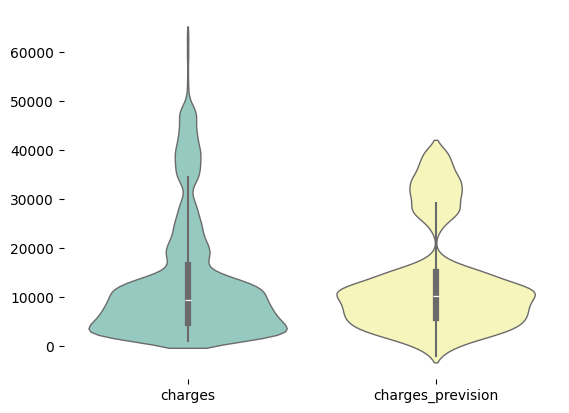

In [59]:

sns.violinplot(data=pd_predicao2[['charges', 'charges_prevision']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)